In [25]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [26]:
df = pd.read_csv('sweet_potato.csv')

df.head()

,Date,price
0,2016-01/05,24229
1,2016-01/12,24795
2,2016-01/19,23201
3,2016-01/26,24247
4,2016-02/02,22088


In [27]:
df.describe()

,price
count,306.000000
mean,28612.964052
std,8069.097917
min,14777.000000
25%,22504.750000
50%,25613.000000
75%,33731.500000
max,53107.000000


In [28]:
df = df.rename(columns={'Date' : 'ds', 'price' : 'y'})
df.head

<bound method NDFrame.head of              ds      y
0    2016-01/05  24229
1    2016-01/12  24795
2    2016-01/19  23201
3    2016-01/26  24247
4    2016-02/02  22088
..          ...    ...
301  2022-08/12  23299
302  2022-08/19  22793
303  2022-08/26  23333
304  2022-09/02  22373
305  2022-09/16  24579

[306 rows x 2 columns]>

<AxesSubplot:xlabel='ds'>

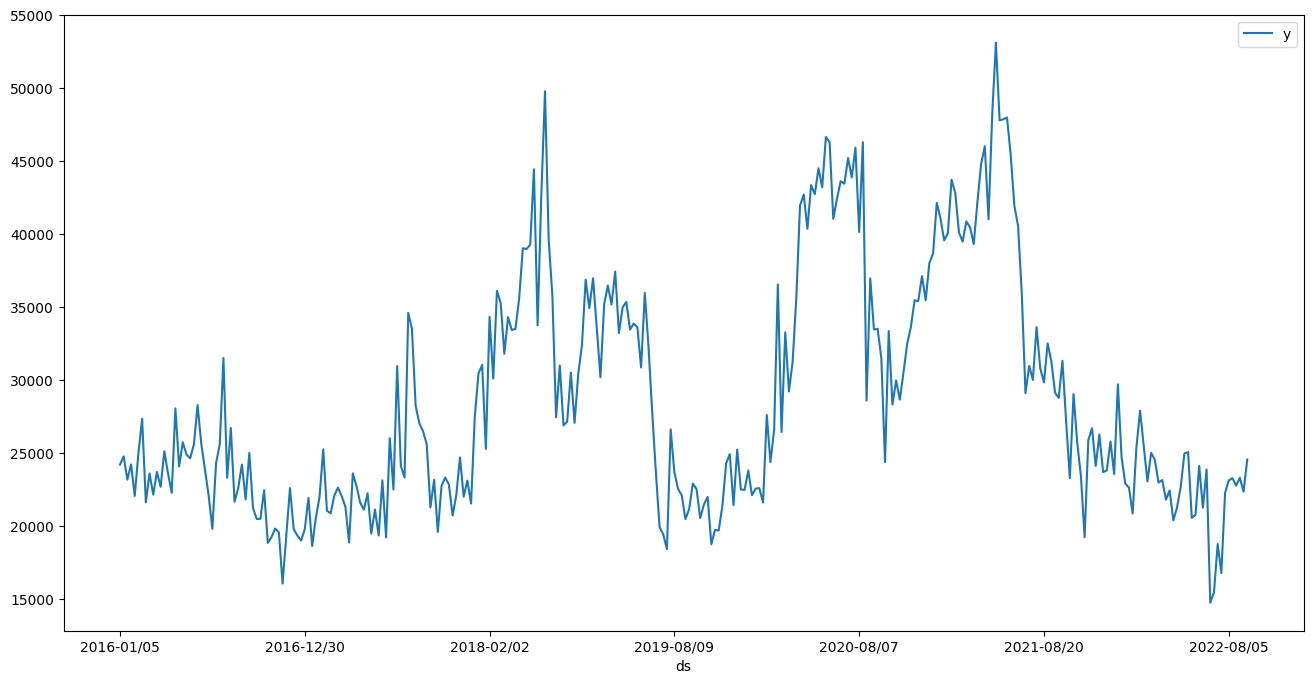

In [29]:
df.plot(x='ds', y='y', figsize=(16,8))

In [30]:
model = Prophet()

model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.45885
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       521.827     0.0111928       162.969           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       523.608    0.00133572       133.155   1.318e-05       0.001      202  LS failed, Hessian reset 
     199       523.941   1.84514e-05       76.8006           1           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       523.941   3.12264e-08       71.2409      0.9728      0.9728      352   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [31]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast.tail(n=670)
forecast.tail()
forecast.to_csv('sweet_potato_result.csv')
b = pd.read_csv('sweet_potato_result.csv')
c = (b[['ds','yhat',]])

c.to_csv('2.csv')



/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


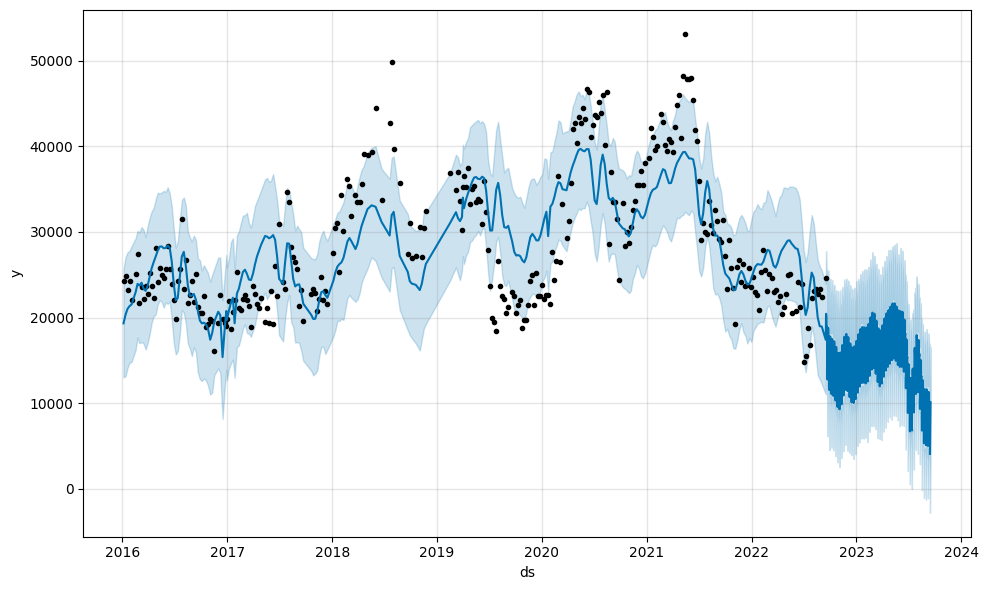

In [32]:
fig1 = model.plot(forecast)


